In [1]:
%matplotlib inline

import os, subprocess, tarfile
from glob import glob
import numpy as np
import xarray as xr
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs
import math

import warnings
warnings.filterwarnings('ignore')

import string
alphabet=list(string.ascii_lowercase)

seconds_per_day=60.*60.*24.
seconds_per_year=365.*seconds_per_day
carbon_molar_mass=12.011
cobalt_n_2_c = 106./16.
efd = 1/math.e #about 0.368

In [2]:
cases={}
cases['ctrl']={}
cases['tunOnly']={}
cases['hpOnly']={}
cases['tun_hp']={}

for i in cases:
    cases[i]['machine_target']='gfdl.ncrc4-intel19-prod'
    if i == 'ctrl':
        cases[i]['path_root']='/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT'
    else:
        cases[i]['path_root']='/archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2'
            
cases['ctrl']['name']='OM4p5_CORE2_IAF_gzCOBALT-013022_cy5'
cases['tunOnly']['name']='OM4p5_CORE2_IAF_gzCOBALT-tun_cy5'
cases['hpOnly']['name']='OM4p5_CORE2_IAF_gzCOBALT-hp_cy5'
cases['tun_hp']['name']='OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5'

print(cases)

{'ctrl': {'machine_target': 'gfdl.ncrc4-intel19-prod', 'path_root': '/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT', 'name': 'OM4p5_CORE2_IAF_gzCOBALT-013022_cy5'}, 'tunOnly': {'machine_target': 'gfdl.ncrc4-intel19-prod', 'path_root': '/archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2', 'name': 'OM4p5_CORE2_IAF_gzCOBALT-tun_cy5'}, 'hpOnly': {'machine_target': 'gfdl.ncrc4-intel19-prod', 'path_root': '/archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2', 'name': 'OM4p5_CORE2_IAF_gzCOBALT-hp_cy5'}, 'tun_hp': {'machine_target': 'gfdl.ncrc4-intel19-prod', 'path_root': '/archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2', 'name': 'OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5'}}


In [3]:
grid_file=os.path.join(cases['ctrl']['path_root'], cases['ctrl']['name'], cases['ctrl']['machine_target'], 'pp')+'/ocean_annual/ocean_annual.static.nc'
#grid=xr.open_dataset(grid_file)
grid = xr.open_dataset('/work/jyl/tmp/ocean_static.nc')

In [4]:
import pandas as pd
pd.DataFrame.from_dict(cases).T

,machine_target,path_root,name
ctrl,gfdl.ncrc4-intel19-prod,/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT,OM4p5_CORE2_IAF_gzCOBALT-013022_cy5
tunOnly,gfdl.ncrc4-intel19-prod,/archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2,OM4p5_CORE2_IAF_gzCOBALT-tun_cy5
hpOnly,gfdl.ncrc4-intel19-prod,/archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2,OM4p5_CORE2_IAF_gzCOBALT-hp_cy5
tun_hp,gfdl.ncrc4-intel19-prod,/archive/Jessica.Luo/gz_test/MOM6_SIS2_gzCOBALTv2,OM4p5_CORE2_IAF_gzCOBALT-tun_hp_cy5


# Read in Files
Use expc from ocean_cobalt_omip_rates_year_z

and MLD_003 from ocean_monthly

In [5]:
diagTypes_ann = 'ocean_cobalt_omip_rates_year_z'
pp_dates='1988-2007'

diag_mon = 'ocean_monthly.198801-200712.MLD_003.nc'

just read everything in because python doesn't store it in memory until you actually need to use it

In [6]:
case='ctrl'

files_ann = glob('/work/Jessica.Luo/tmp/'+cases[case]['name'] + '/'+ diagTypes_ann + '.' + pp_dates + '*.nc')
files_mon = glob('/work/Jessica.Luo/tmp/'+cases[case]['name'] + '/'+ diag_mon)

dc_ann = xr.open_dataset(files_ann[0]).isel(time=0)
dc_mon = xr.open_dataset(files_mon[0])

In [7]:
case='tunOnly'

files_ann = glob('/work/Jessica.Luo/tmp/'+cases[case]['name'] + '/'+ diagTypes_ann + '.' + pp_dates + '*.nc')
files_mon = glob('/work/Jessica.Luo/tmp/'+cases[case]['name'] + '/'+ diag_mon)

d1_ann = xr.open_dataset(files_ann[0]).isel(time=0)
d1_mon = xr.open_dataset(files_mon[0])

In [8]:
case='hpOnly'

files_ann = glob('/work/Jessica.Luo/tmp/'+cases[case]['name'] + '/'+ diagTypes_ann + '.' + pp_dates + '*.nc')
files_mon = glob('/work/Jessica.Luo/tmp/'+cases[case]['name'] + '/'+ diag_mon)

d2_ann = xr.open_dataset(files_ann[0]).isel(time=0)
d2_mon = xr.open_dataset(files_mon[0])

In [9]:
case='tun_hp'

files_ann = glob('/work/Jessica.Luo/tmp/'+cases[case]['name'] + '/'+ diagTypes_ann + '.' + pp_dates + '*.nc')
files_mon = glob('/work/Jessica.Luo/tmp/'+cases[case]['name'] + '/'+ diag_mon)

d3_ann = xr.open_dataset(files_ann[0]).isel(time=0)
d3_mon = xr.open_dataset(files_mon[0])

## Process MLD data

In [10]:
dc_mon = dc_mon.groupby('time.month').mean(dim='time')
d1_mon = d1_mon.groupby('time.month').mean(dim='time')
d2_mon = d2_mon.groupby('time.month').mean(dim='time')
d3_mon = d3_mon.groupby('time.month').mean(dim='time')

In [11]:
days_in_month = xr.DataArray([31,28,31,30,31,30,31,31,30,31,30,31], coords={'month':dc_mon.month}, dims='month')

In [12]:
days_in_month_wgts=days_in_month / days_in_month.mean()
days_in_month_wgts

<xarray.DataArray (month: 12)>
array([1.01917808, 0.92054795, 1.01917808, 0.98630137, 1.01917808,
       0.98630137, 1.01917808, 1.01917808, 0.98630137, 1.01917808,
       0.98630137, 1.01917808])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [13]:
dc_mld_ann = (dc_mon.MLD_003 * days_in_month_wgts).mean(dim='month')
d1_mld_ann = (d1_mon.MLD_003 * days_in_month_wgts).mean(dim='month')
d2_mld_ann = (d2_mon.MLD_003 * days_in_month_wgts).mean(dim='month')
d3_mld_ann = (d3_mon.MLD_003 * days_in_month_wgts).mean(dim='month')

# Compute normalized flux, referenced to a fixed depth (75m)
Normalize to 75 m following Kwon et al. 2009

In [14]:
dc_ann.z_l.values

array([2.5000e+00, 1.0000e+01, 2.0000e+01, 3.2500e+01, 5.1250e+01,
       7.5000e+01, 1.0000e+02, 1.2500e+02, 1.5625e+02, 2.0000e+02,
       2.5000e+02, 3.1250e+02, 4.0000e+02, 5.0000e+02, 6.0000e+02,
       7.0000e+02, 8.0000e+02, 9.0000e+02, 1.0000e+03, 1.1000e+03,
       1.2000e+03, 1.3000e+03, 1.4000e+03, 1.5375e+03, 1.7500e+03,
       2.0625e+03, 2.5000e+03, 3.0000e+03, 3.5000e+03, 4.0000e+03,
       4.5000e+03, 5.0000e+03, 5.5000e+03, 6.0000e+03, 6.5000e+03])

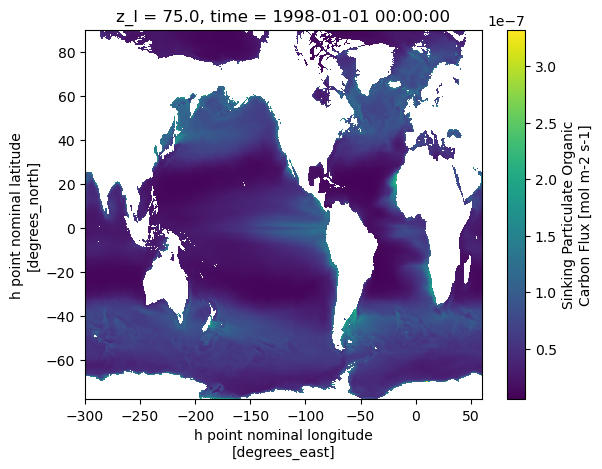

In [15]:
dc_ann.expc.sel(z_l=75.).plot()

In [16]:
dc_ann['norm_expc'] = dc_ann.expc / dc_ann.expc.sel(z_l=75.)
d1_ann['norm_expc'] = d1_ann.expc / d1_ann.expc.sel(z_l=75.)
d2_ann['norm_expc'] = d2_ann.expc / d2_ann.expc.sel(z_l=75.)
d3_ann['norm_expc'] = d3_ann.expc / d3_ann.expc.sel(z_l=75.)

In [17]:
# dc_ann['norm_expc'] = dc_ann.expc / dc_ann.expc.sel(z_l=100.)
# d1_ann['norm_expc'] = d1_ann.expc / d1_ann.expc.sel(z_l=100.)
# d2_ann['norm_expc'] = d2_ann.expc / d2_ann.expc.sel(z_l=100.)
# d3_ann['norm_expc'] = d3_ann.expc / d3_ann.expc.sel(z_l=100.)

In [18]:
dc_norm_expc = dc_ann.norm_expc.isel(z_l=slice(5,None))
d1_norm_expc = d1_ann.norm_expc.isel(z_l=slice(5,None))
d2_norm_expc = d2_ann.norm_expc.isel(z_l=slice(5,None))
d3_norm_expc = d3_ann.norm_expc.isel(z_l=slice(5,None))

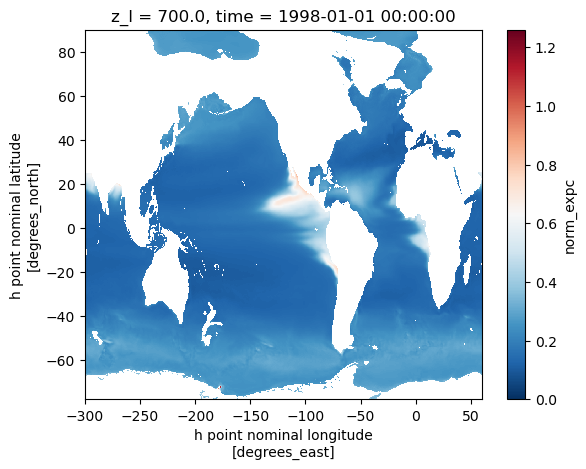

In [19]:
dc_norm_expc.isel(z_l=10).plot(vmax=1.26, vmin=0, cmap='RdBu_r')

In [20]:
dc_remin_ls = dc_norm_expc.where(dc_norm_expc <= efd).idxmax(dim='z_l') - 75.
d1_remin_ls = d1_norm_expc.where(d1_norm_expc <= efd).idxmax(dim='z_l') - 75.
d2_remin_ls = d2_norm_expc.where(d2_norm_expc <= efd).idxmax(dim='z_l') - 75.
d3_remin_ls = d3_norm_expc.where(d3_norm_expc <= efd).idxmax(dim='z_l') - 75.

dc_remin_ls

<xarray.DataArray 'z_l' (yh: 576, xh: 720)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    time     object 1998-01-01 00:00:00
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89

# Plot

In [21]:
ctrl_vmax = 600.
ctrl_vmin = 150.
diff_vmax = 300.

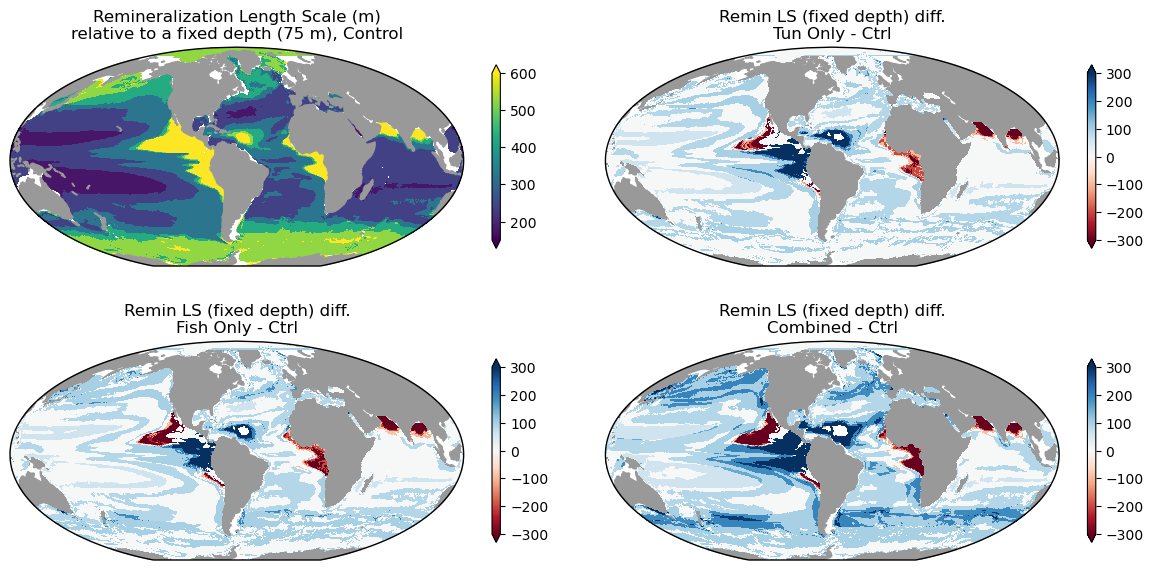

In [22]:
fig=plt.figure(figsize=(15,7))
gs=gridspec.GridSpec(2,2, wspace=0.05)

ax={};cs={}
fs = 12

i=0
field=dc_remin_ls
ax[i]=plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmax=ctrl_vmax, vmin=ctrl_vmin)
ax[i].add_feature(cartopy.feature.LAND, zorder=1, facecolor='#999999')
ax[i].set_title('Remineralization Length Scale (m)\nrelative to a fixed depth (75 m), Control', fontsize=fs)
plt.colorbar(cs[i], shrink=0.75, extend='both')

i=1
field=(d1_remin_ls - dc_remin_ls)
ax[i]=plt.subplot(gs[0,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=-diff_vmax, vmax=diff_vmax, cmap='RdBu')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Remin LS (fixed depth) diff.\nTun Only - Ctrl', fontsize=fs)
plt.colorbar(cs[i], shrink=0.75, extend='both')

i=2
field=(d2_remin_ls - dc_remin_ls)
ax[i] = plt.subplot(gs[1,0],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=-diff_vmax, vmax=diff_vmax, cmap='RdBu')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Remin LS (fixed depth) diff.\nFish Only - Ctrl', fontsize=fs)
plt.colorbar(cs[i], shrink=0.75, extend='both')

i=3
field=(d3_remin_ls - dc_remin_ls)
ax[i] = plt.subplot(gs[1,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=-diff_vmax, vmax=diff_vmax, cmap='RdBu')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Remin LS (fixed depth) diff.\nCombined - Ctrl', fontsize=fs)
plt.colorbar(cs[i], shrink=0.75, extend='both')

plt.tight_layout()
plt.savefig('plots/Combined_ReminLengthScale_ref75m.png', dpi=300, bbox_inches='tight')


# Compute normalized flux, referenced to the depth of max export flux

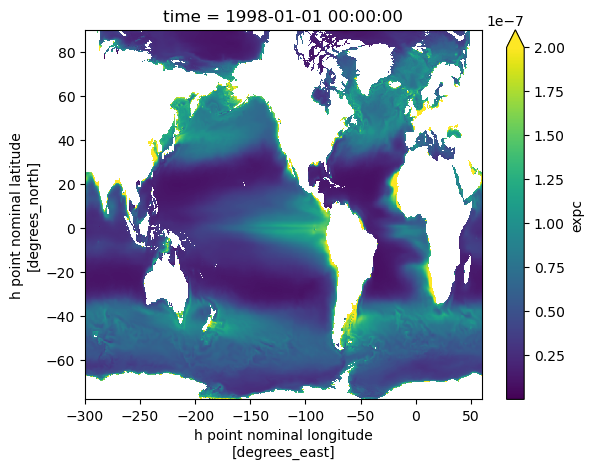

In [22]:
dc_ann.expc.max(dim='z_l').plot(vmax=2e-7)

In [23]:
dc_max_z = dc_ann.expc.idxmax(dim='z_l')
d1_max_z = d1_ann.expc.idxmax(dim='z_l')
d2_max_z = d2_ann.expc.idxmax(dim='z_l')
d3_max_z = d3_ann.expc.idxmax(dim='z_l')

Calculate the depth at which the max export flux occurs

In [24]:
dc_ann['norm_expc_refmax'] = dc_ann.expc / dc_ann.expc.max(dim='z_l')
d1_ann['norm_expc_refmax'] = d1_ann.expc / d1_ann.expc.max(dim='z_l')
d2_ann['norm_expc_refmax'] = d2_ann.expc / d2_ann.expc.max(dim='z_l')
d3_ann['norm_expc_refmax'] = d3_ann.expc / d3_ann.expc.max(dim='z_l')

Recalculate the normalized export flux relative to the depth at which the maximum flux occurs.

In [25]:
dc_norm_expc = dc_ann.norm_expc_refmax.where(dc_ann.z_l >= dc_max_z)
dc_remin_ls = dc_norm_expc.where(dc_norm_expc <= efd).idxmax(dim='z_l') - dc_max_z

In [26]:
d1_norm_expc = d1_ann.norm_expc_refmax.where(d1_ann.z_l >= d1_max_z)
d1_remin_ls = d1_norm_expc.where(d1_norm_expc <= efd).idxmax(dim='z_l') - d1_max_z

In [27]:
d2_norm_expc = d2_ann.norm_expc_refmax.where(d2_ann.z_l >= d2_max_z)
d2_remin_ls = d2_norm_expc.where(d2_norm_expc <= efd).idxmax(dim='z_l') - d2_max_z

In [28]:
d3_norm_expc = d3_ann.norm_expc_refmax.where(d3_ann.z_l >= d3_max_z)
d3_remin_ls = d3_norm_expc.where(d3_norm_expc <= efd).idxmax(dim='z_l') - d3_max_z

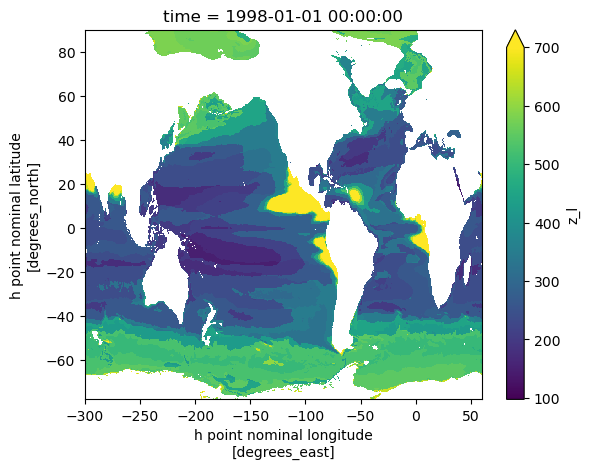

In [29]:
dc_remin_ls.plot(vmax=700.)

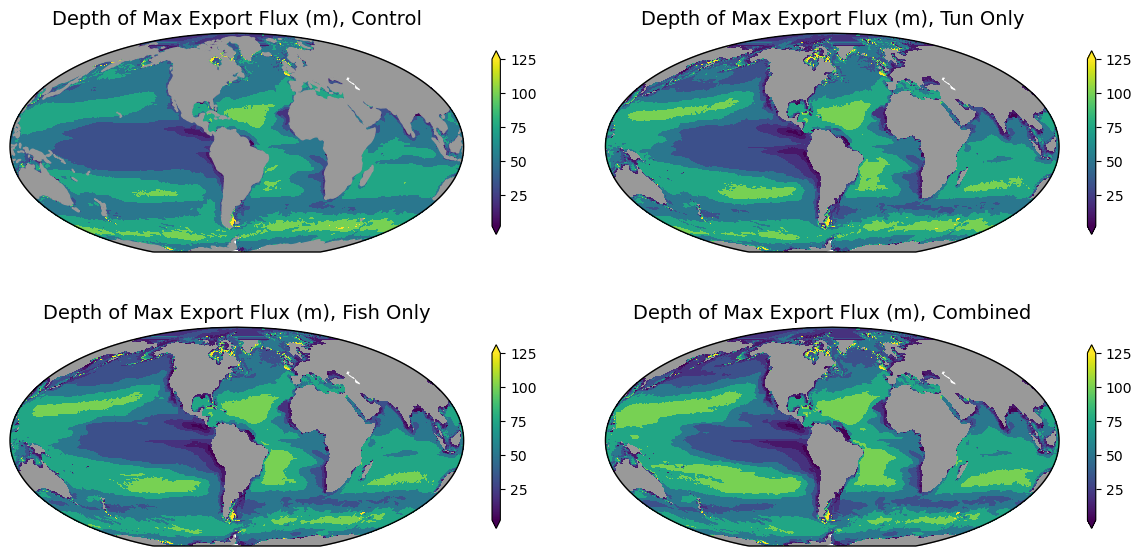

In [30]:
fig=plt.figure(figsize=(15,7))
gs=gridspec.GridSpec(2,2, wspace=0.05)

ax={};cs={}

vmax=125. # meters

i=0
field=dc_max_z
ax[i]=plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmax=vmax)
ax[i].add_feature(cartopy.feature.LAND, zorder=1, facecolor='#999999')
ax[i].set_title('Depth of Max Export Flux (m), Control', fontsize=14)
plt.colorbar(cs[i], shrink=0.75, extend='both')

i=1
field=d1_max_z
ax[i]=plt.subplot(gs[0,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmax=vmax)
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Depth of Max Export Flux (m), Tun Only', fontsize=14)
plt.colorbar(cs[i], shrink=0.75, extend='both')

i=2
field=d2_max_z
ax[i] = plt.subplot(gs[1,0],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmax=vmax)
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Depth of Max Export Flux (m), Fish Only', fontsize=14)
plt.colorbar(cs[i], shrink=0.75, extend='both')

i=3
field=d3_max_z
ax[i] = plt.subplot(gs[1,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmax=vmax)
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Depth of Max Export Flux (m), Combined', fontsize=14)
plt.colorbar(cs[i], shrink=0.75, extend='both')

plt.tight_layout()
#plt.savefig('plots/Combined_ReminLengthScale_refMaxFlux.png', dpi=300, bbox_inches='tight')


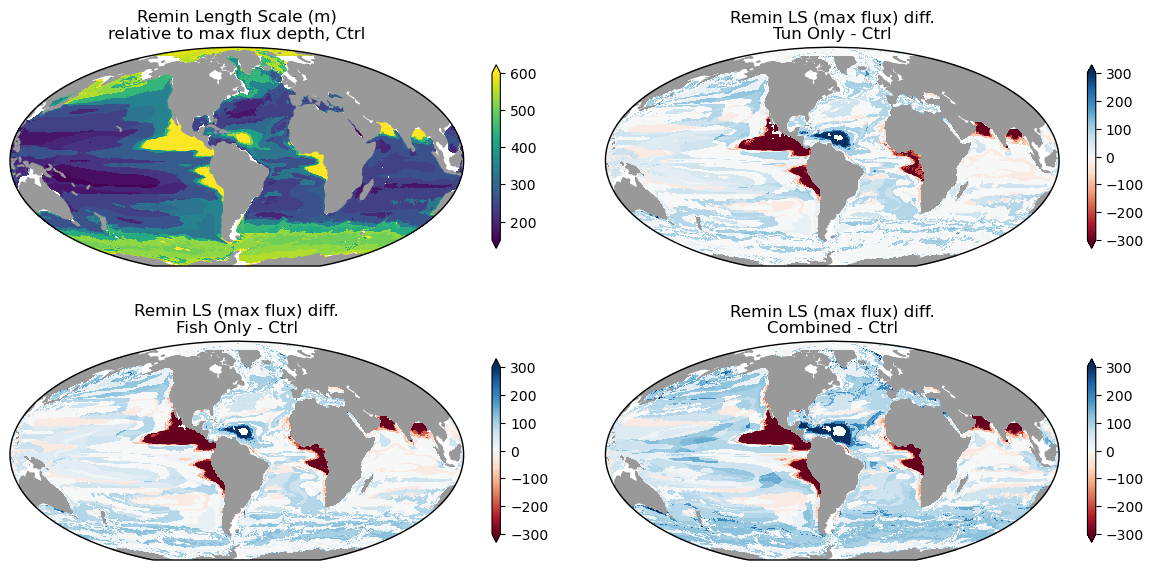

In [31]:
fig=plt.figure(figsize=(15,7))
gs=gridspec.GridSpec(2,2, wspace=0.05)

ax={};cs={}
fs=12

i=0
field=dc_remin_ls
ax[i]=plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmax=ctrl_vmax, vmin=ctrl_vmin)
ax[i].add_feature(cartopy.feature.LAND, zorder=1, facecolor='#999999')
ax[i].set_title('Remin Length Scale (m)\nrelative to max flux depth, Ctrl', fontsize=fs)
plt.colorbar(cs[i], shrink=0.75, extend='both')

i=1
field=(d1_remin_ls - dc_remin_ls)
ax[i]=plt.subplot(gs[0,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=-diff_vmax, vmax=diff_vmax, cmap='RdBu')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Remin LS (max flux) diff.\nTun Only - Ctrl', fontsize=fs)
plt.colorbar(cs[i], shrink=0.75, extend='both')

i=2
field=(d2_remin_ls - dc_remin_ls)
ax[i] = plt.subplot(gs[1,0],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=-diff_vmax, vmax=diff_vmax, cmap='RdBu')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Remin LS (max flux) diff.\nFish Only - Ctrl', fontsize=fs)
plt.colorbar(cs[i], shrink=0.75, extend='both')

i=3
field=(d3_remin_ls - dc_remin_ls)
ax[i] = plt.subplot(gs[1,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=-diff_vmax, vmax=diff_vmax, cmap='RdBu')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Remin LS (max flux) diff.\nCombined - Ctrl', fontsize=fs)
plt.colorbar(cs[i], shrink=0.75, extend='both')

plt.tight_layout()
plt.savefig('plots/Combined_ReminLengthScale_refMaxFlux.png', dpi=300, bbox_inches='tight')


# Compute normalized flux, referenced to the mean mixed layer depth

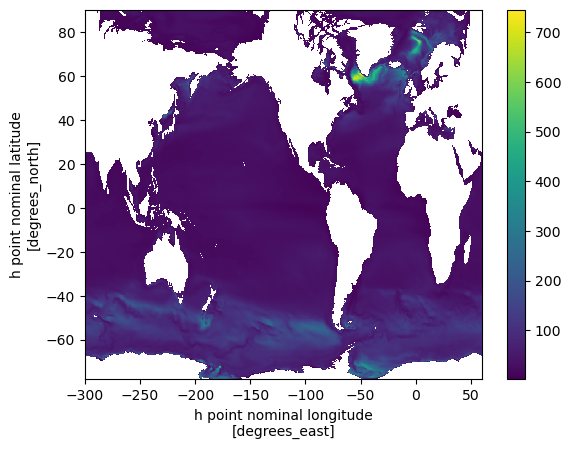

In [32]:
dc_mld_ann.plot()

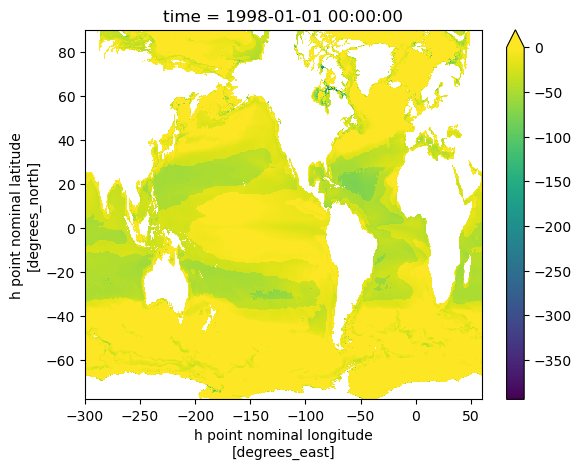

In [33]:
(dc_mld_ann - dc_max_z).plot(vmax=0)

Restrict data to only values at or below the annual mixed layer. in most areas this depth is below the max productivity depth, but in some areas it is not.

In [34]:
dc_below_ml = dc_ann.expc.where(dc_ann.expc.z_l >= dc_mld_ann)
d1_below_ml = d1_ann.expc.where(d1_ann.expc.z_l >= dc_mld_ann)
d2_below_ml = d2_ann.expc.where(d2_ann.expc.z_l >= dc_mld_ann)
d3_below_ml = d3_ann.expc.where(d3_ann.expc.z_l >= dc_mld_ann)

# find z_l value of first non-null value in dc_below_ml
dc_z_mld = dc_ann.z_l.where(dc_below_ml.notnull()).idxmin(dim='z_l')
d1_z_mld = d1_ann.z_l.where(d1_below_ml.notnull()).idxmin(dim='z_l')
d2_z_mld = d2_ann.z_l.where(d2_below_ml.notnull()).idxmin(dim='z_l')
d3_z_mld = d3_ann.z_l.where(d3_below_ml.notnull()).idxmin(dim='z_l')

# and then the carbon flux at this depth
dc_at_ml = dc_below_ml.sel(z_l=dc_z_mld, method='nearest')
d1_at_ml = d1_below_ml.sel(z_l=d1_z_mld, method='nearest')
d2_at_ml = d2_below_ml.sel(z_l=d2_z_mld, method='nearest')
d3_at_ml = d3_below_ml.sel(z_l=d3_z_mld, method='nearest')

In [35]:
dc_ann['norm_expc_refmld'] = dc_below_ml / dc_at_ml
d1_ann['norm_expc_refmld'] = d1_below_ml / d1_at_ml
d2_ann['norm_expc_refmld'] = d2_below_ml / d2_at_ml
d3_ann['norm_expc_refmld'] = d3_below_ml / d3_at_ml

Recalculate the normalized export flux relative to the depth at which the maximum flux occurs.

In [36]:
dc_remin_ls = dc_ann['norm_expc_refmld'].where(dc_ann['norm_expc_refmld'] <= efd).idxmax(dim='z_l') - dc_z_mld
d1_remin_ls = d1_ann['norm_expc_refmld'].where(d1_ann['norm_expc_refmld'] <= efd).idxmax(dim='z_l') - d1_z_mld
d2_remin_ls = d2_ann['norm_expc_refmld'].where(d2_ann['norm_expc_refmld'] <= efd).idxmax(dim='z_l') - d2_z_mld
d3_remin_ls = d3_ann['norm_expc_refmld'].where(d3_ann['norm_expc_refmld'] <= efd).idxmax(dim='z_l') - d3_z_mld

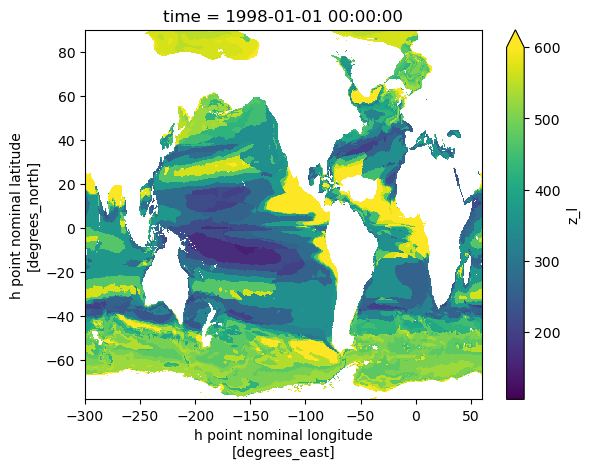

In [37]:
dc_remin_ls.plot(vmax=600.)

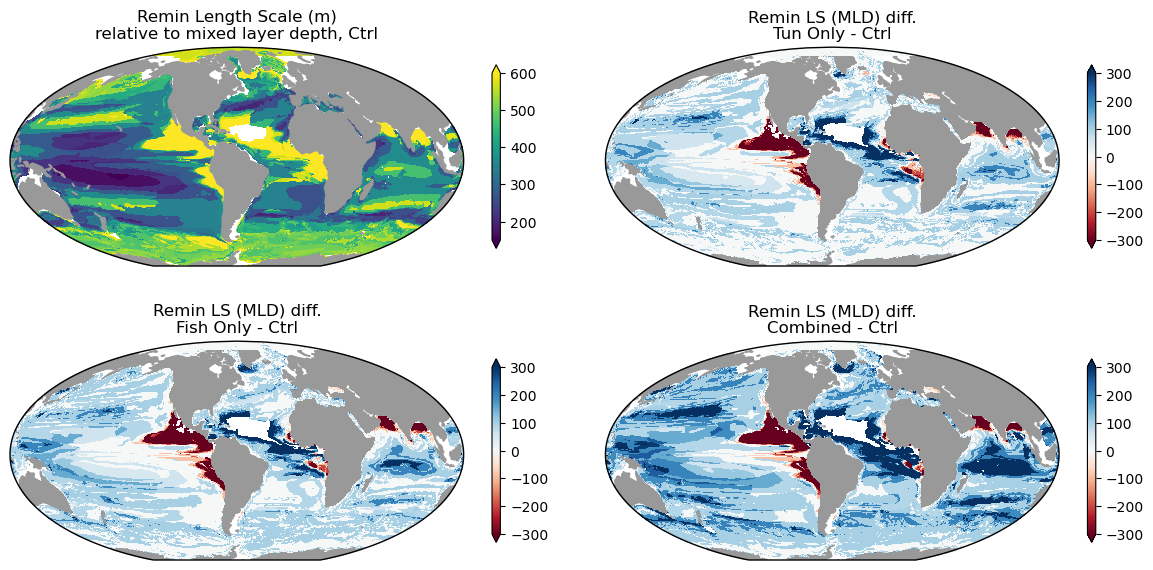

In [38]:
fig=plt.figure(figsize=(15,7))
gs=gridspec.GridSpec(2,2, wspace=0.05)

ax={};cs={}
fs=12

i=0
field=dc_remin_ls
ax[i]=plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmax=ctrl_vmax, vmin=ctrl_vmin)
ax[i].add_feature(cartopy.feature.LAND, zorder=1, facecolor='#999999')
ax[i].set_title('Remin Length Scale (m)\nrelative to mixed layer depth, Ctrl', fontsize=fs)
plt.colorbar(cs[i], shrink=0.75, extend='both')

i=1
field=(d1_remin_ls - dc_remin_ls)
ax[i]=plt.subplot(gs[0,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=-diff_vmax, vmax=diff_vmax, cmap='RdBu')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Remin LS (MLD) diff.\nTun Only - Ctrl', fontsize=fs)
plt.colorbar(cs[i], shrink=0.75, extend='both')

i=2
field=(d2_remin_ls - dc_remin_ls)
ax[i] = plt.subplot(gs[1,0],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=-diff_vmax, vmax=diff_vmax, cmap='RdBu')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Remin LS (MLD) diff.\nFish Only - Ctrl', fontsize=fs)
plt.colorbar(cs[i], shrink=0.75, extend='both')

i=3
field=(d3_remin_ls - dc_remin_ls)
ax[i] = plt.subplot(gs[1,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=-diff_vmax, vmax=diff_vmax, cmap='RdBu')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Remin LS (MLD) diff.\nCombined - Ctrl', fontsize=fs)
plt.colorbar(cs[i], shrink=0.75, extend='both')

plt.tight_layout()
plt.savefig('plots/Combined_ReminLengthScale_refMLD.png', dpi=300, bbox_inches='tight')


# Compute how many e-folding depths are contained within a fixed range
Use 100-1000 m to start with

In [39]:
dc_ann.z_l.values

array([2.5000e+00, 1.0000e+01, 2.0000e+01, 3.2500e+01, 5.1250e+01,
       7.5000e+01, 1.0000e+02, 1.2500e+02, 1.5625e+02, 2.0000e+02,
       2.5000e+02, 3.1250e+02, 4.0000e+02, 5.0000e+02, 6.0000e+02,
       7.0000e+02, 8.0000e+02, 9.0000e+02, 1.0000e+03, 1.1000e+03,
       1.2000e+03, 1.3000e+03, 1.4000e+03, 1.5375e+03, 1.7500e+03,
       2.0625e+03, 2.5000e+03, 3.0000e+03, 3.5000e+03, 4.0000e+03,
       4.5000e+03, 5.0000e+03, 5.5000e+03, 6.0000e+03, 6.5000e+03])

In [40]:
dc_frac_to_1000 = dc_ann.expc.sel(z_l=1000.) / dc_ann.expc.sel(z_l=100.)
d1_frac_to_1000 = d1_ann.expc.sel(z_l=1000.) / d1_ann.expc.sel(z_l=100.)
d2_frac_to_1000 = d2_ann.expc.sel(z_l=1000.) / d2_ann.expc.sel(z_l=100.)
d3_frac_to_1000 = d3_ann.expc.sel(z_l=1000.) / d3_ann.expc.sel(z_l=100.)

In [41]:
dc_efolding_depths = np.log(1/dc_frac_to_1000)
d1_efolding_depths = np.log(1/d1_frac_to_1000)
d2_efolding_depths = np.log(1/d2_frac_to_1000)
d3_efolding_depths = np.log(1/d3_frac_to_1000)

In [42]:
dc_remin_ls = (1000.-100.) / dc_efolding_depths
d1_remin_ls = (1000.-100.) / d1_efolding_depths
d2_remin_ls = (1000.-100.) / d2_efolding_depths
d3_remin_ls = (1000.-100.) / d3_efolding_depths

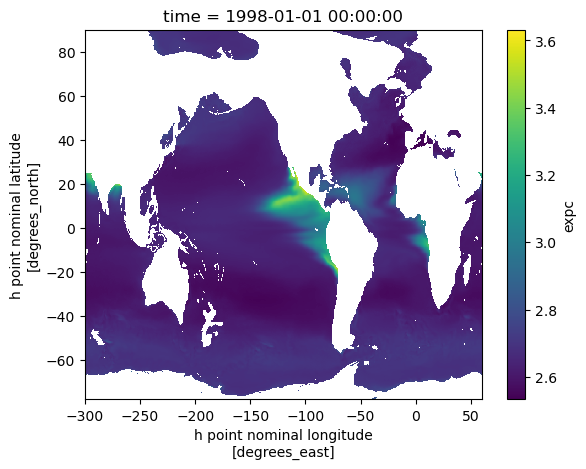

In [43]:
np.log10(dc_remin_ls).plot()

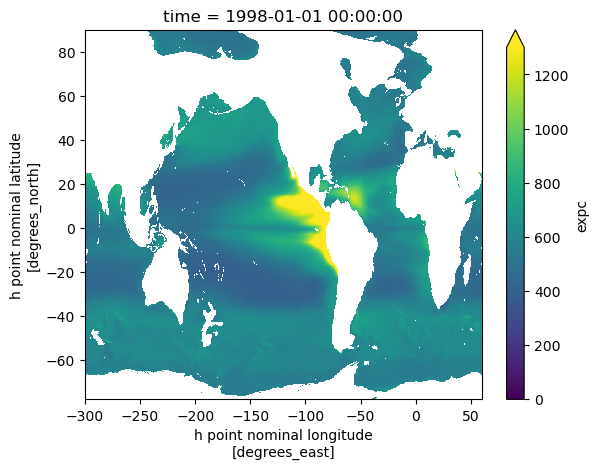

In [44]:
d3_remin_ls.plot(vmax=1300, vmin=0)

# Plot

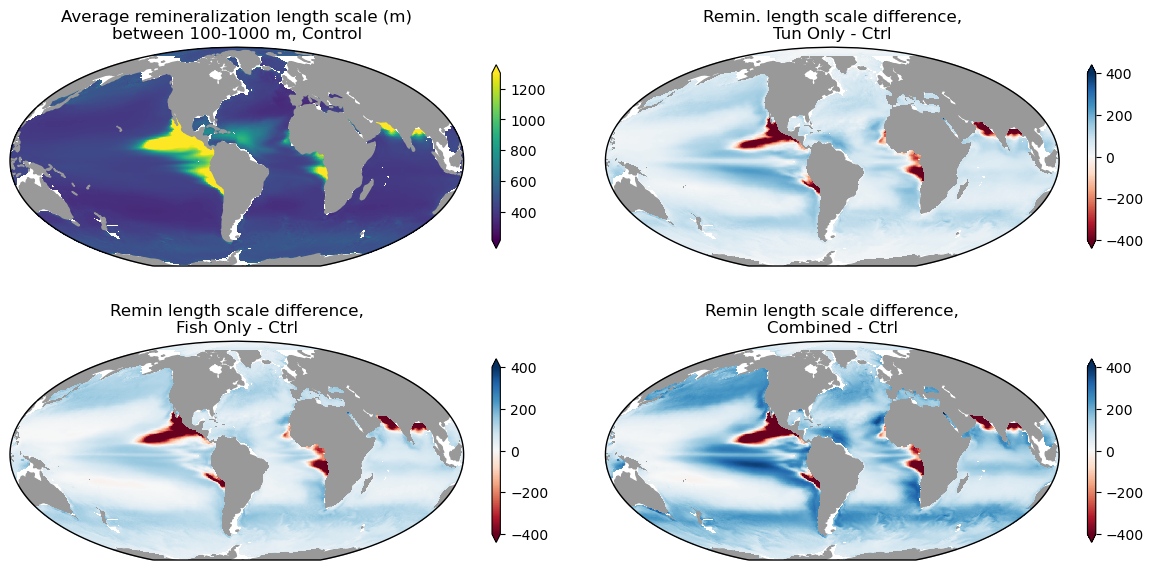

In [45]:
fig=plt.figure(figsize=(15,7))
gs=gridspec.GridSpec(2,2, wspace=0.05)

ax={};cs={}
fs = 12

i=0
field=dc_remin_ls
ax[i]=plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmax=1300, vmin=220)
ax[i].add_feature(cartopy.feature.LAND, zorder=1, facecolor='#999999')
ax[i].set_title('Average remineralization length scale (m)\nbetween 100-1000 m, Control', fontsize=fs)
plt.colorbar(cs[i], shrink=0.75, extend='both')

i=1
field=(d1_remin_ls - dc_remin_ls)
ax[i]=plt.subplot(gs[0,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=-400, vmax=400, cmap='RdBu')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Remin. length scale difference,\nTun Only - Ctrl', fontsize=fs)
plt.colorbar(cs[i], shrink=0.75, extend='both')

i=2
field=(d2_remin_ls - dc_remin_ls)
ax[i] = plt.subplot(gs[1,0],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=-400, vmax=400, cmap='RdBu')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Remin length scale difference,\nFish Only - Ctrl', fontsize=fs)
plt.colorbar(cs[i], shrink=0.75, extend='both')

i=3
field=(d3_remin_ls - dc_remin_ls)
ax[i] = plt.subplot(gs[1,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=-400, vmax=400, cmap='RdBu')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Remin length scale difference,\nCombined - Ctrl', fontsize=fs)
plt.colorbar(cs[i], shrink=0.75, extend='both')

plt.tight_layout()
plt.savefig('plots/Combined_ReminLengthScale_100-to-1000.png', dpi=300, bbox_inches='tight')


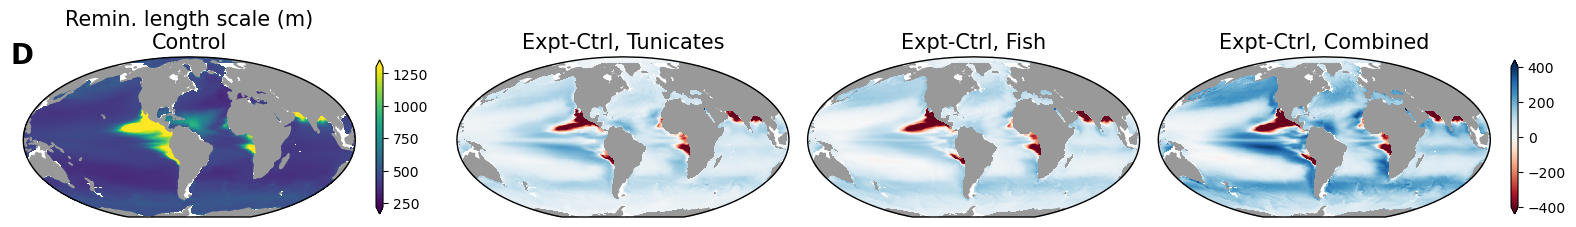

In [66]:
fig=plt.figure(figsize=(20,4))
gs=gridspec.GridSpec(1,4, wspace=0.05, width_ratios=[1.25,1,1,1.25])

ax={};cs={}
fs = 15

i=0
field=dc_remin_ls
ax[i]=plt.subplot(gs[0,0],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmax=1300, vmin=220)
ax[i].add_feature(cartopy.feature.LAND, zorder=1, facecolor='#999999')
ax[i].set_title('Remin. length scale (m)\nControl', fontsize=fs)
plt.colorbar(cs[i], shrink=0.5, extend='both')
ax[i].text(-0.04, 1.1, 'D', transform=ax[i].transAxes, fontsize=20, fontweight='bold', va='top')

i=1
field=(d1_remin_ls - dc_remin_ls)
ax[i]=plt.subplot(gs[0,1],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=-400, vmax=400, cmap='RdBu')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt-Ctrl, Tunicates', fontsize=fs)
#plt.colorbar(cs[i], shrink=0.75, extend='both')

i=2
field=(d2_remin_ls - dc_remin_ls)
ax[i] = plt.subplot(gs[0,2],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=-400, vmax=400, cmap='RdBu')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt-Ctrl, Fish', fontsize=fs)
#plt.colorbar(cs[i], shrink=0.75, extend='both')

i=3
field=(d3_remin_ls - dc_remin_ls)
ax[i] = plt.subplot(gs[0,3],projection=ccrs.Mollweide(central_longitude=300.0))
cs[i]=ax[i].pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree(), vmin=-400, vmax=400, cmap='RdBu')
ax[i].add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
ax[i].set_title('Expt-Ctrl, Combined', fontsize=fs)
plt.colorbar(cs[i], shrink=0.5, extend='both')

plt.tight_layout()
plt.savefig('plots/Combined_ReminLengthScale_100-to-1000_horiz.png', dpi=300, bbox_inches='tight')


In [47]:
temp=dc_remin_ls.where((dc_remin_ls.xh < -92) & (dc_remin_ls.xh > -112) & (dc_remin_ls.yh > 12) & (dc_remin_ls.yh < 18), drop=True)
temp

<xarray.DataArray 'expc' (yh: 15, xh: 40)>
array([[2354.1855, 2325.4792, 2296.7747, 2268.8506, 2234.2178, 2190.2195,
        2144.8484, 2102.0745, 2072.9114, 2054.1482, 2048.097 , 2044.0134,
        2023.5779, 1997.2004, 1962.8712, 1928.5778, 1895.7616, 1861.7463,
        1829.4033, 1806.7004, 1785.6746, 1768.1172, 1756.3541, 1757.3904,
        1760.7327, 1763.124 , 1762.4895, 1752.8904, 1744.4521, 1732.3894,
        1710.4563, 1697.3433, 1699.4592, 1700.0713, 1690.614 , 1681.7686,
        1684.9745, 1691.3696, 1695.6598, 1681.9532],
       [2480.471 , 2446.5056, 2415.973 , 2392.0344, 2358.9824, 2322.5718,
        2284.5637, 2250.06  , 2222.4368, 2200.4814, 2189.0833, 2170.8145,
        2141.929 , 2111.2524, 2077.8699, 2042.0872, 2008.2421, 1971.421 ,
        1939.1926, 1914.5062, 1890.4612, 1864.7117, 1841.9952, 1840.1409,
        1844.8427, 1850.2399, 1860.5459, 1867.1442, 1873.4938, 1882.3541,
        1886.03  , 1876.514 , 1881.0326, 1880.0714, 1857.3884, 1827.702 ,
        1804.9868, 1804.0492, 1807.6316, 1769.6237],
       [2571.0645, 2536.6343, 2511.6348, 2493.079 , 2475.0889, 2451.2622,
        2430.2227, 2403.9036, 2378.6191, 2356.789 , 2333.9895, 2302.904 ,
        2264.8557, 2230.0955, 2193.8547, 2158.388 , 2125.9172, 2093.061 ,
        2066.7783, 2037.4875, 2014.8187, 1988.322 , 1959.1932, 1946.5411,
        1947.6841, 1951.1691, 1962.2771, 1977.4602, 1988.6311, 2005.1212,
        2033.0686, 2048.2761, 2062.1191, 2066.2898, 2026.2693, 1961.353 ,
...
        1958.6462, 1977.7819, 2008.0073, 2048.7805, 2096.8706, 2132.7495,
        2163.8723, 2197.6672, 2249.2786, 2315.2034, 2407.024 , 2576.617 ,
        2877.5378, 3201.7485, 3244.8247, 3454.0823, 3534.6765,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan],
       [1681.3438, 1811.223 , 1933.5295, 2041.2494, 2110.2498, 2148.4531,
        2161.826 , 2172.6702, 2188.454 , 2209.4907, 2227.3977, 2232.044 ,
        2244.779 , 2296.1687, 2356.6948, 2445.8174, 2558.4548, 2776.9895,
        3171.8953, 3396.0898, 3431.5496,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan],
       [1747.1781, 1899.8905, 2042.0378, 2166.2122, 2257.1873, 2304.2808,
        2330.7627, 2341.867 , 2357.045 , 2365.4111, 2355.4355, 2350.2434,
        2358.239 , 2416.7815, 2513.0679, 2694.3982, 2867.6848, 3126.447 ,
        3349.655 ,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan]], dtype=float32)
Coordinates:
  * xh       (xh) float64 -111.8 -111.2 -110.8 -110.2 ... -93.25 -92.75 -92.25
  * yh       (yh) float64 12.2 12.57 12.95 13.33 ... 16.49 16.9 17.31 17.73
    time     object 1998-01-01 00:00:00

In [48]:
dc_remin_ls.where((dc_remin_ls.xh < -92) & (dc_remin_ls.xh > -112) & (dc_remin_ls.yh > 12) & (dc_remin_ls.yh < 18), drop=True).mean()

<xarray.DataArray 'expc' ()>
array(2239.7063, dtype=float32)
Coordinates:
    time     object 1998-01-01 00:00:00

In [49]:
dc_frac_to_1000.where((dc_remin_ls.xh < -92) & (dc_remin_ls.xh > -112) & (dc_remin_ls.yh > 12) & (dc_remin_ls.yh < 18), drop=True).mean()

<xarray.DataArray 'expc' ()>
array(0.66286874, dtype=float32)
Coordinates:
    time     object 1998-01-01 00:00:00

In [50]:
d1_remin_ls.where((dc_remin_ls.xh < -92) & (dc_remin_ls.xh > -112) & (dc_remin_ls.yh > 12) & (dc_remin_ls.yh < 18), drop=True).mean()

<xarray.DataArray 'expc' ()>
array(1748.3077, dtype=float32)
Coordinates:
    time     object 1998-01-01 00:00:00

In [51]:
d1_frac_to_1000.where((dc_remin_ls.xh < -92) & (dc_remin_ls.xh > -112) & (dc_remin_ls.yh > 12) & (dc_remin_ls.yh < 18), drop=True).mean()

<xarray.DataArray 'expc' ()>
array(0.59313923, dtype=float32)
Coordinates:
    time     object 1998-01-01 00:00:00

In [52]:
d2_remin_ls.where((dc_remin_ls.xh < -92) & (dc_remin_ls.xh > -112) & (dc_remin_ls.yh > 12) & (dc_remin_ls.yh < 18), drop=True).mean()

<xarray.DataArray 'expc' ()>
array(1610.6266, dtype=float32)
Coordinates:
    time     object 1998-01-01 00:00:00

In [53]:
d2_frac_to_1000.where((dc_remin_ls.xh < -92) & (dc_remin_ls.xh > -112) & (dc_remin_ls.yh > 12) & (dc_remin_ls.yh < 18), drop=True).mean()

<xarray.DataArray 'expc' ()>
array(0.56708515, dtype=float32)
Coordinates:
    time     object 1998-01-01 00:00:00

In [54]:
d3_remin_ls.where((dc_remin_ls.xh < -92) & (dc_remin_ls.xh > -112) & (dc_remin_ls.yh > 12) & (dc_remin_ls.yh < 18), drop=True).mean()

<xarray.DataArray 'expc' ()>
array(1388.7006, dtype=float32)
Coordinates:
    time     object 1998-01-01 00:00:00

In [55]:
d3_frac_to_1000.where((dc_remin_ls.xh < -92) & (dc_remin_ls.xh > -112) & (dc_remin_ls.yh > 12) & (dc_remin_ls.yh < 18), drop=True).mean()

<xarray.DataArray 'expc' ()>
array(0.51604307, dtype=float32)
Coordinates:
    time     object 1998-01-01 00:00:00

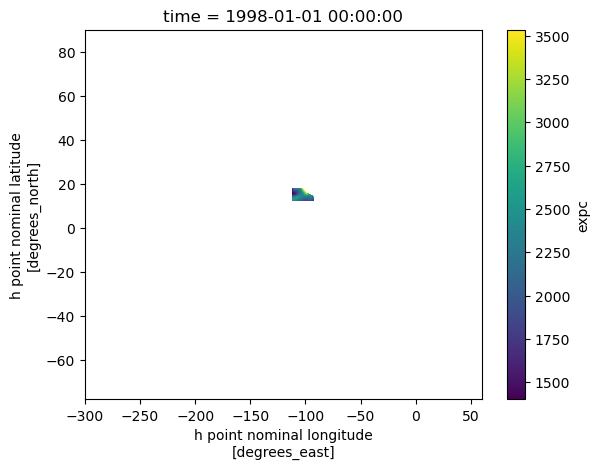

In [56]:
dc_remin_ls.where((dc_remin_ls.xh < -92) & (dc_remin_ls.xh > -112) & (dc_remin_ls.yh > 12) & (dc_remin_ls.yh < 18)).plot()

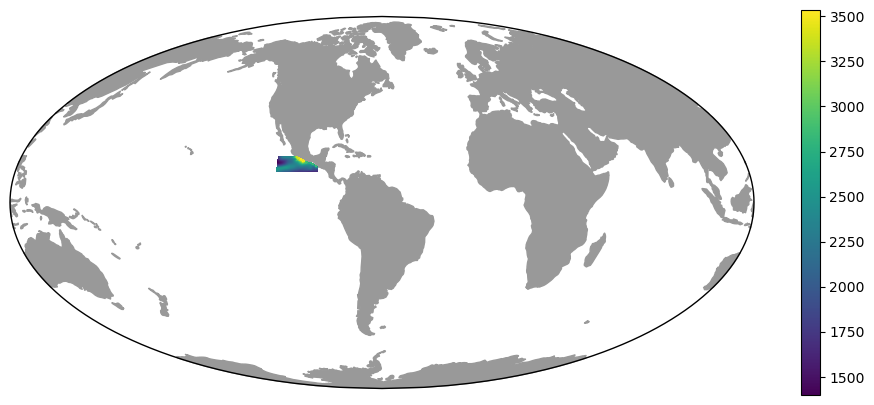

In [57]:
plt.figure(figsize=(12,5))
ax=plt.axes(projection=ccrs.Mollweide(central_longitude=300.0))

field=dc_remin_ls.where((dc_remin_ls.xh < -92) & (dc_remin_ls.xh > -112) & (dc_remin_ls.yh > 12) & (dc_remin_ls.yh < 18))
ax.add_feature(cartopy.feature.LAND, zorder=0, facecolor='#999999')
cs=ax.pcolormesh(grid.geolon.values, grid.geolat.values, field, transform=ccrs.PlateCarree())
plt.colorbar(cs)